<a href="https://colab.research.google.com/github/chosangwoong/AI-sysetem/blob/main/wine_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


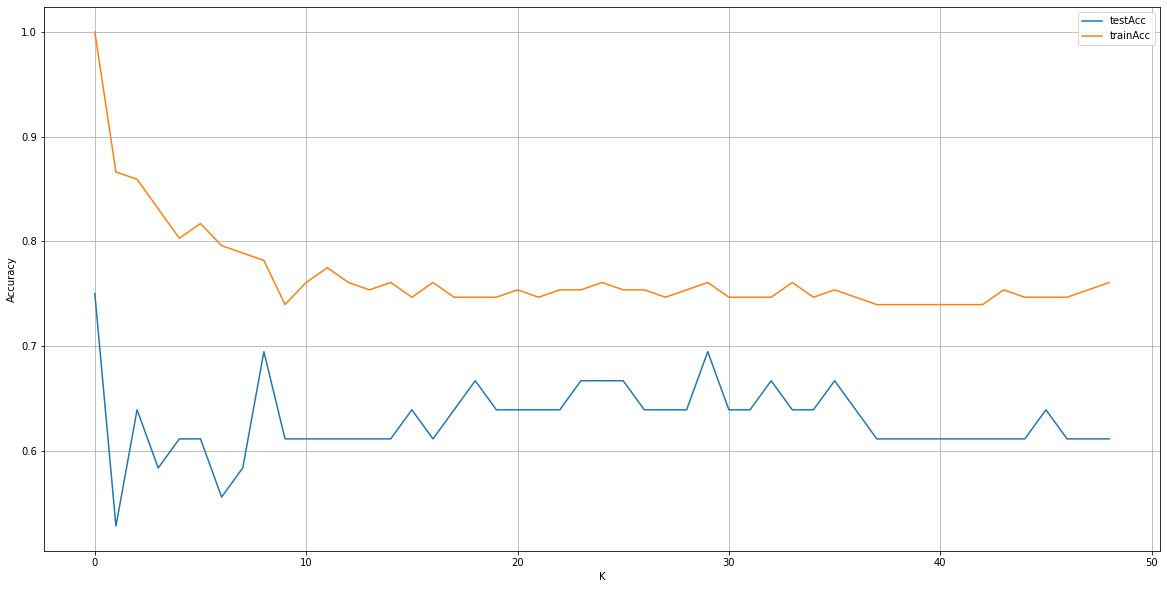

In [ ]:
# 데이터 불러오기
from sklearn.datasets import load_wine
# 데이터 시각화를 위한 모듈
import matplotlib.pyplot as plt
# 데이터를 train과 test로 나눠주는 모듈
from sklearn.model_selection import train_test_split
# KNN알고리즘 
from sklearn.neighbors import KNeighborsClassifier
# 상태 진행 바 모듈
from tqdm import tqdm_notebook

wine = load_wine()

# train 데이터셋과 test 데이터셋 구성
trainX, testX, trainY, testY = \
    train_test_split(wine['data'], wine['target'], test_size=0.2)

testAcc = []
trainAcc = []

for k in tqdm_notebook(range(1, 50)):
    # KNN으로 train 데이터를 학습
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(trainX, trainY)

    # test 데이터셋에 대한 class를 추정하고 정확도 계산
    # accuracy = knn.score(testX, testY) 와 같음
    predY = knn.predict(testX)
    accuracy = (predY == testY).mean()
    testAcc.append(accuracy)
    #print('test 데이터셋에 대한 class분류 정확도 = %.2f' % accuracy)

    # train 데이터셋에 대한 class를 추정하고 정확도 계산
    # accuracy = knn.score(trainX, trainY) 와 같음
    predY = knn.predict(trainX)
    accuracy = (predY == trainY).mean()
    trainAcc.append(accuracy)
    #print('train 데이터셋에 대한 class분류 정확도 = %.2f' % accuracy)
    
# 정확도 시각화
plt.figure(figsize=(20, 10))
plt.plot(testAcc, label='testAcc')
plt.plot(trainAcc, label='trainAcc')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()